# Trabajo práctico Inteligencia Computacional

**Alumno:** Javier Hernán Mora

Dataset a utilizar: 

- [Estimation of obesity levels based on eating habits and physical condition Data Set](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)

This paper contains data for the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition as mentioned by [1], data was collected using a web platform with a survey (see Table 1) where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records, after a balancing process described in Fig. 1, Fig. 2. The attributes related with eating habits are: 

- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)

The attributes related with the physical condition are: 

- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

other variables obtained were: 
- Gender 
- Age
- Height 
- Weight

Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity. The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format and ARFF format to be used with the Weka tool.


In [50]:
import pandas
df = pandas.read_csv('./dataset/ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [49]:
df['FAF'].value_counts()

0.000000    411
1.000000    234
2.000000    183
3.000000     75
1.067817      2
           ... 
0.979306      1
0.246290      1
1.217180      1
1.684582      1
1.170537      1
Name: FAF, Length: 1190, dtype: int64

In [9]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [3]:
df_numbers = df[['Age', 'Height', 'Weight']]
df_numbers

,Age,Height,Weight
0,21.000000,1.620000,64.000000
1,21.000000,1.520000,56.000000
2,23.000000,1.800000,77.000000
3,27.000000,1.800000,87.000000
4,22.000000,1.780000,89.800000
...,...,...,...
2106,20.976842,1.710730,131.408528
2107,21.982942,1.748584,133.742943
2108,22.524036,1.752206,133.689352
2109,24.361936,1.739450,133.346641


In [4]:
normalized_df = (df_numbers - df_numbers.mean()) / df_numbers.std()
normalized_df

,Age,Height,Weight
0,-0.522001,-0.875382,-0.862354
1,-0.522001,-1.947138,-1.167800
2,-0.206840,1.053779,-0.366003
3,0.423481,1.053779,0.015805
4,-0.364420,0.839428,0.122711
...,...,...,...
2106,-0.525650,0.097022,1.711358
2107,-0.367108,0.502725,1.800488
2108,-0.281843,0.541544,1.798442
2109,0.007774,0.404831,1.785357


In [10]:
x = normalized_df.values
x

array([[-0.5220007 , -0.87538193, -0.86235386],
       [-0.5220007 , -1.94713793, -1.1678003 ],
       [-0.20683997,  1.05377886, -0.36600341],
       ...,
       [-0.28184255,  0.5415438 ,  1.79844164],
       [ 0.0077744 ,  0.4048306 ,  1.78535666],
       [-0.10209489,  0.39825002,  1.79016744]])

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(x)
kmeans.labels_

2111

In [31]:
labels = pandas.DataFrame(data=kmeans.labels_, columns=["label"])
labels['label'].value_counts()

0    395
2    374
1    345
6    334
3    275
5    222
4    166
Name: label, dtype: int64

In [32]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

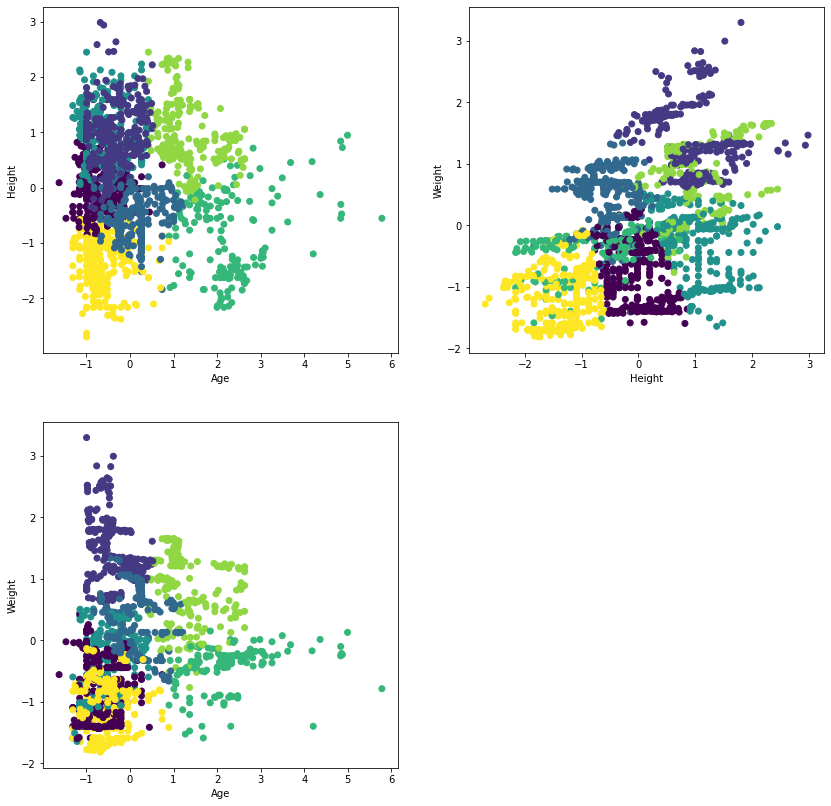

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
sub1 = plt.subplot(221)
sub1.set_xlabel('Age')
sub1.set_ylabel('Height')
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
sub2 = plt.subplot(222)
sub2.set_xlabel('Height')
sub2.set_ylabel('Weight')
plt.scatter(x[:, 1], x[:, 2], c=kmeans.labels_)
sub3 = plt.subplot(223)
sub3.set_xlabel('Age')
sub3.set_ylabel('Weight')
plt.scatter(x[:, 0], x[:, 2], c=kmeans.labels_)
plt.show()

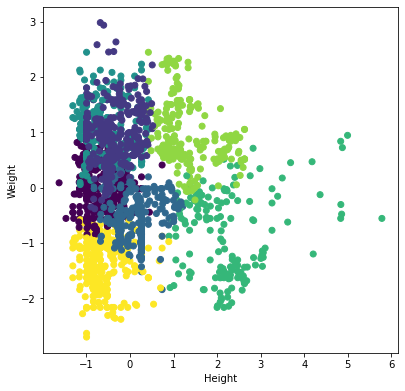

-1456.4643554967533


In [48]:
df_numbers = df[['Height', 'Weight']]
normalized_df = (df_numbers - df_numbers.mean()) / df_numbers.std()
labels = pandas.DataFrame(data=kmeans.labels_, columns=["label"])

kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(x)

plt.figure(figsize=(14,14))
sub1 = plt.subplot(221)
sub1.set_xlabel('Height')
sub1.set_ylabel('Weight')
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.show()

print(kmeans.score(x))